In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data.isnull().sum() # Checking if our dataset contains any NULL value

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Data Analysis

In [6]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

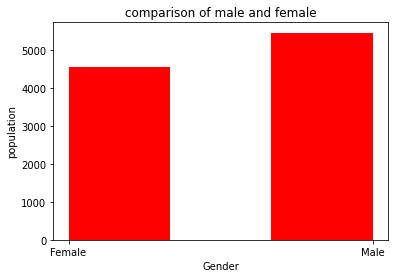

In [7]:
# Plotting the features of the dataset to see the correlation between them

plt.hist(x = data.Gender, bins = 3, color = 'red')
plt.title('comparison of male and female')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()

In [8]:
data['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

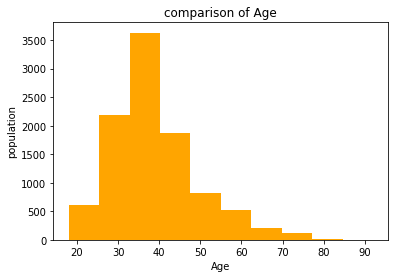

In [9]:
# comparison of age in the dataset

plt.hist(x = data.Age, bins = 10, color = 'orange')
plt.title('comparison of Age')
plt.xlabel('Age')
plt.ylabel('population')
plt.show()

In [10]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

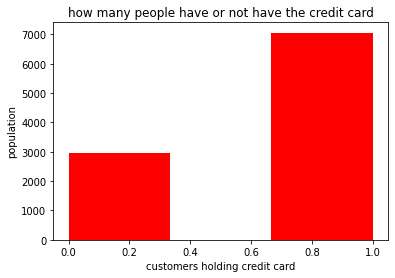

In [11]:
# comparision of how many customers hold the credit card

plt.hist(x = data.HasCrCard, bins = 3, color = 'red')
plt.title('how many people have or not have the credit card')
plt.xlabel('customers holding credit card')
plt.ylabel('population')
plt.show()

In [12]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

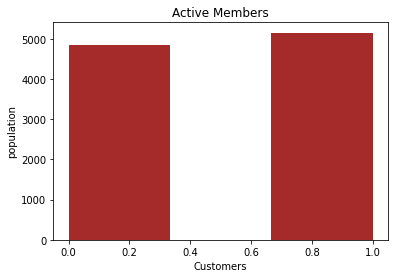

In [13]:
# How many active member does the bank have ?

plt.hist(x = data.IsActiveMember, bins = 3, color = 'brown')
plt.title('Active Members')
plt.xlabel('Customers')
plt.ylabel('population')
plt.show()

In [14]:
data.drop('RowNumber', axis='columns', inplace=True)
data.drop('CustomerId', axis='columns', inplace=True)
data.drop('Surname', axis='columns', inplace=True)
data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [16]:
def print_unique_col_values(data):
    for column in data:
        if(data[column].dtypes=='object'):
            print(f'{column}: {data[column].unique()}')

In [17]:
print_unique_col_values(data)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [18]:
data['Geography'].replace({'France':0, 'Spain':1, 'Germany':2}, inplace=True)
data['Gender'].replace({'Female':0, 'Male':1}, inplace=True)

In [19]:
for col in data:
    print(f'{col}: {data[col].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [20]:
data.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
982,668,0,1,32,7,0.00,2,1,1,777.37,0
2329,850,0,1,35,3,162442.35,1,1,0,183566.78,0
2729,667,0,1,23,1,0.00,2,1,0,91573.19,0
1436,576,2,1,28,1,119336.29,2,0,1,58976.85,0
8174,564,1,1,31,0,125175.58,1,1,1,72757.33,0


In [21]:
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])
data.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4264,0.634,2,0,0.513514,0.8,0.547888,1,1,0,0.654239,1
3734,0.892,2,1,0.297297,0.2,0.451292,2,1,1,0.232040,0
2672,0.748,0,1,0.216216,0.2,0.615731,2,0,0,0.392783,0
6769,0.824,0,0,0.351351,0.7,0.634985,1,0,0,0.123855,0
7921,0.476,1,0,0.229730,0.7,0.000000,2,1,1,0.543690,0


In [22]:
#Train Test Split for our ANN

x = data.drop('Exited',axis='columns')
y = data['Exited']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [23]:
x_train.shape

(8000, 10)

In [24]:
x_test.shape

(2000, 10)

In [25]:
x_train[:10]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7751,0.800,1,0,0.283784,0.6,0.000000,2,0,0,0.096273
4154,0.752,0,1,0.216216,0.3,0.000000,2,1,0,0.981478
3881,0.476,0,0,0.621622,0.3,0.000000,1,1,1,0.948551
9238,0.846,0,0,0.432432,0.4,0.000000,2,1,0,0.646869
5210,0.402,0,1,0.229730,0.7,0.517012,2,0,0,0.434670
7487,0.602,0,0,0.513514,0.4,0.000000,1,0,0,0.421898
7542,0.314,1,0,0.216216,0.4,0.000000,2,1,1,0.303413
7524,0.620,0,0,0.297297,0.8,0.666330,1,1,1,0.925815
9412,0.750,0,1,0.108108,0.6,0.393324,1,0,0,0.668609
6377,0.684,0,1,0.202703,0.9,0.000000,1,1,0,0.567526


In [26]:
len(x_train.columns)

10

In [27]:
import keras
from tensorflow import keras

model = keras.Sequential([
      keras.layers.Dense(10, input_shape=(10,), activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
    ])
    
model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics = ['accuracy']
    )
    
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5110 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4788 - accuracy: 0.7972
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7997
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.8014
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4580 - accuracy: 0.8037
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4538 - accuracy: 0.8052
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4493 - accuracy: 0.8077
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4452 - accuracy: 0.8095
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.8101
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4383 - accura

250/250 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.8436
Epoch 82/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3721 - accuracy: 0.8456
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3718 - accuracy: 0.8455
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3715 - accuracy: 0.8451
Epoch 85/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.8462
Epoch 86/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3710 - accuracy: 0.8461
Epoch 87/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3703 - accuracy: 0.8454
Epoch 88/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3702 - accuracy: 0.8469
Epoch 89/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8454
Epoch 90/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3688 - accuracy: 

In [28]:
yp = model.predict(x_test)
yp[:10]

array([[0.06246278],
       [0.12557751],
       [0.07590166],
       [0.06294653],
       [0.11964515],
       [0.16928807],
       [0.03291392],
       [0.43892944],
       [0.03272474],
       [0.48475397]], dtype=float32)

In [30]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [33]:
y_pred[:11]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [34]:
#Evaluating the prediction
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.69      0.42      0.52       405

    accuracy                           0.84      2000
   macro avg       0.78      0.69      0.71      2000
weighted avg       0.83      0.84      0.83      2000

